In [1472]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [1473]:
# Chargement des données
ins_prof_dut = pd.read_csv("../csv/fr-esr-insertion_professionnelle-dut_donnees_nationales.csv", sep=";")
ins_prof_lp = pd.read_csv("../csv//fr-esr-insertion_professionnelle-lp_donnees_nationales.csv", sep=";")
ins_prof_master = pd.read_csv("../csv/fr-esr-insertion_professionnelle-master_donnees_nationales.csv", sep=";")

In [1474]:
# Agrégation de toutes les formations (DUT, LP, MASTER)
ins_prof = pd.concat([ins_prof_dut, ins_prof_lp, ins_prof_master], keys=["D", "L", "M"])

In [1475]:
ins_prof.head()

Année Diplôme                 situation             Genre  \
D 0  2013     DUT  30 mois après le diplôme            hommes   
  1  2017     DUT  18 mois après le diplôme  femmes et hommes   
  2  2017     DUT  18 mois après le diplôme            hommes   
  3  2017     DUT  18 mois après le diplôme  femmes et hommes   
  4  2017     DUT  18 mois après le diplôme            femmes   

                                           Disciplines Code du domaine  \
D 0  Droit, économie et gestion>Droit>Carrières jur...             DEG   
  1  Sciences, technologies et santé>Informatique>I...             STS   
  2  Sciences, technologies et santé>Informatique>I...             STS   
  3  Sciences humaines et sociales>Information comm...             SHS   
  4  Sciences humaines et sociales>Information comm...             SHS   

                             Domaine Code de la discipline  \
D 0       Droit, économie et gestion                disc02   
  1  Sciences, technologies et santé                disc16   
  2  Sciences, technologies et santé                disc16   
  3    Sciences humaines et sociales                disc10   
  4    Sciences humaines et sociales                disc10   

                    Discipline Sigle  ... Secteur disciplinaire  \
D 0                      Droit   NaN  ...                   NaN   
  1               Informatique   NaN  ...                   NaN   
  2               Informatique   NaN  ...                   NaN   
  3  Information communication   NaN  ...                   NaN   
  4  Information communication   NaN  ...                   NaN   

     Administration publique (hors ens.)  \
D 0                                  NaN   
  1                                  NaN   
  2                                  NaN   
  3                                  NaN   
  4                                  NaN   

    Prof. libérale, indépendant, chef d’entreprise  \
D 0                                            NaN   
  1                                            NaN   
  2                                            NaN   
  3                                            NaN   
  4                                            NaN   

    Contrat de professionnalisation  \
D 0                             NaN   
  1                             NaN   
  2                             NaN   
  3                             NaN   
  4                             NaN   

    La fonction publique (d'etat, territoriale ou hospitalière)  \
D 0                                                NaN            
  1                                                NaN            
  2                                                NaN            
  3                                                NaN            
  4                                                NaN            

    Organisation internationale ou une institution de l'Union européenne  \
D 0                                                NaN                     
  1                                                NaN                     
  2                                                NaN                     
  3                                                NaN                     
  4                                                NaN                     

    Société d'économie mixte Agriculture, sylviculture et pêche  \
D 0                      NaN                                NaN   
  1                      NaN                                NaN   
  2                      NaN                                NaN   
  3                      NaN                                NaN   
  4                      NaN                                NaN   

    Artisan, commerçant, chef d'entreprise  \
D 0                                    NaN   
  1                                    NaN   
  2                                    NaN   
  3                                    NaN   
  4                                    NaN   

    Ingénieur, cadre, prof.

In [1476]:
ins_prof.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5920 entries, ('D', 0) to ('M', 2924)
Data columns (total 86 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Année                                                                  5920 non-null   object 
 1   Diplôme                                                                5920 non-null   object 
 2   situation                                                              5920 non-null   object 
 3   Genre                                                                  5920 non-null   object 
 4   Disciplines                                                            5920 non-null   object 
 5   Code du domaine                                                        5920 non-null   object 
 6   Domaine                                                                592

In [1477]:
ins_prof.reset_index(inplace=True)

In [1478]:
ins_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 88 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   level_0                                                                5920 non-null   object 
 1   level_1                                                                5920 non-null   int64  
 2   Année                                                                  5920 non-null   object 
 3   Diplôme                                                                5920 non-null   object 
 4   situation                                                              5920 non-null   object 
 5   Genre                                                                  5920 non-null   object 
 6   Disciplines                                                            5920 non-null   o

In [1479]:
ins_prof.drop("level_1", axis=1, inplace=True)
ins_prof.rename(columns={"level_0": "label"}, inplace=True)

In [1480]:
ins_prof["Diplôme"].unique()

array(['DUT', 'LICENCE PRO', 'MASTER LMD', 'MASTER ENS'], dtype=object)

In [1481]:
ins_prof.head()

,label,Année,Diplôme,situation,Genre,Disciplines,Code du domaine,Domaine,Code de la discipline,Discipline,...,Secteur disciplinaire,Administration publique (hors ens.),"Prof. libérale, indépendant, chef d’entreprise",Contrat de professionnalisation,"La fonction publique (d'etat, territoriale ou hospitalière)",Organisation internationale ou une institution de l'Union européenne,Société d'économie mixte,"Agriculture, sylviculture et pêche","Artisan, commerçant, chef d'entreprise","Ingénieur, cadre, prof. libérales, prof. intellectuelles sup"
0,D,2013,DUT,30 mois après le diplôme,hommes,"Droit, économie et gestion>Droit>Carrières jur...",DEG,"Droit, économie et gestion",disc02,Droit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D,2017,DUT,18 mois après le diplôme,femmes et hommes,"Sciences, technologies et santé>Informatique>I...",STS,"Sciences, technologies et santé",disc16,Informatique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D,2017,DUT,18 mois après le diplôme,hommes,"Sciences, technologies et santé>Informatique>I...",STS,"Sciences, technologies et santé",disc16,Informatique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,2017,DUT,18 mois après le diplôme,femmes et hommes,Sciences humaines et sociales>Information comm...,SHS,Sciences humaines et sociales,disc10,Information communication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D,2017,DUT,18 mois après le diplôme,femmes,Sciences humaines et sociales>Information comm...,SHS,Sciences humaines et sociales,disc10,Information communication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1482]:
ins_prof[ins_prof["label"] == "D"]["Année"].unique()

array(['2013', '2017', '2014', '2019', "'2019", '2015', '2016', "'2013",
       "'2014", "'2015", "'2017", "'2016"], dtype=object)

In [1483]:
# Liste des codes du domaine des diplômes
ins_prof["Code du domaine"].unique()

array(['DEG', 'STS', 'SHS', 'ALL', 'LLA', 'MEEF'], dtype=object)

In [1484]:
# Délais d'insertion après diplôme
ins_prof["situation"].unique()

array(['30 mois après le diplôme', '18 mois après le diplôme'],
      dtype=object)

In [1485]:
# Sélection des variables correspondant aux métiers
df_metier = ins_prof.iloc[:, 32:89]

In [1486]:
# Ajout de l'indication de l'année
df = ins_prof[["Année", "label", "Diplôme"]].join(df_metier)

In [1487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 58 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Année                                                                  5920 non-null   object
 1   label                                                                  5920 non-null   object
 2   Diplôme                                                                5920 non-null   object
 3   Fonctionnaire                                                          1502 non-null   object
 4   CDI                                                                    1502 non-null   object
 5   CDI de chantier ou CDI de mission                                      1079 non-null   object
 6   Contrat spécifique au doctorat                                         183 non-null    object
 7

In [1488]:
# Suppression des lignes dont toutes valeurs des variables sont manquantes
df.dropna(subset=df.columns[1:], how='all', inplace=True)

In [1489]:
#
#metier = df.melt(id_vars=["Année", "label", "Diplôme"], var_name="contrat", value_name="nb") 

In [1490]:
# Sélection des types de contrats
df_contrat = df.iloc[:, 1:15]

In [1491]:
# Recherche des valeurs représentant l'année
df['Année'].unique()

array(['2013', '2017', '2014', '2019', "'2019", '2015', '2016', "'2013",
       "'2014", "'2015", "'2017", "'2016", '2018', "'2018", 2013, 2014,
       2012, 2011, 2019, 2016, 2015, 2018, 2017], dtype=object)

In [1492]:
# Extraction des années
years = df['Année'].astype(str).str.extract(r"([0-9]{4})", expand=True)

In [1493]:
years

,0
0,2013
1,2017
2,2017
3,2017
4,2017
...,...
5915,2013
5916,2019
5917,2015
5918,2015


In [1494]:
# Renommage de la colonne des années
years = years.rename(columns={0: "Année"})
# ajout de la colonne des années à la DataFrame stockant les contrats
df_contrat = years.join(df_contrat)
# Changement de type en integer de la colonne des années
df_contrat["Année"] = df_contrat["Année"].astype(int)

In [1495]:
df_contrat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Année                                       5920 non-null   int64 
 1   label                                       5920 non-null   object
 2   Diplôme                                     5920 non-null   object
 3   Fonctionnaire                               1502 non-null   object
 4   CDI                                         1502 non-null   object
 5   CDI de chantier ou CDI de mission           1079 non-null   object
 6   Contrat spécifique au doctorat              183 non-null    object
 7   CDD                                         1502 non-null   object
 8   Vacataire                                   1502 non-null   object
 9   Intérimaire                                 1502 non-null   object
 10  Intermittent du spectacl

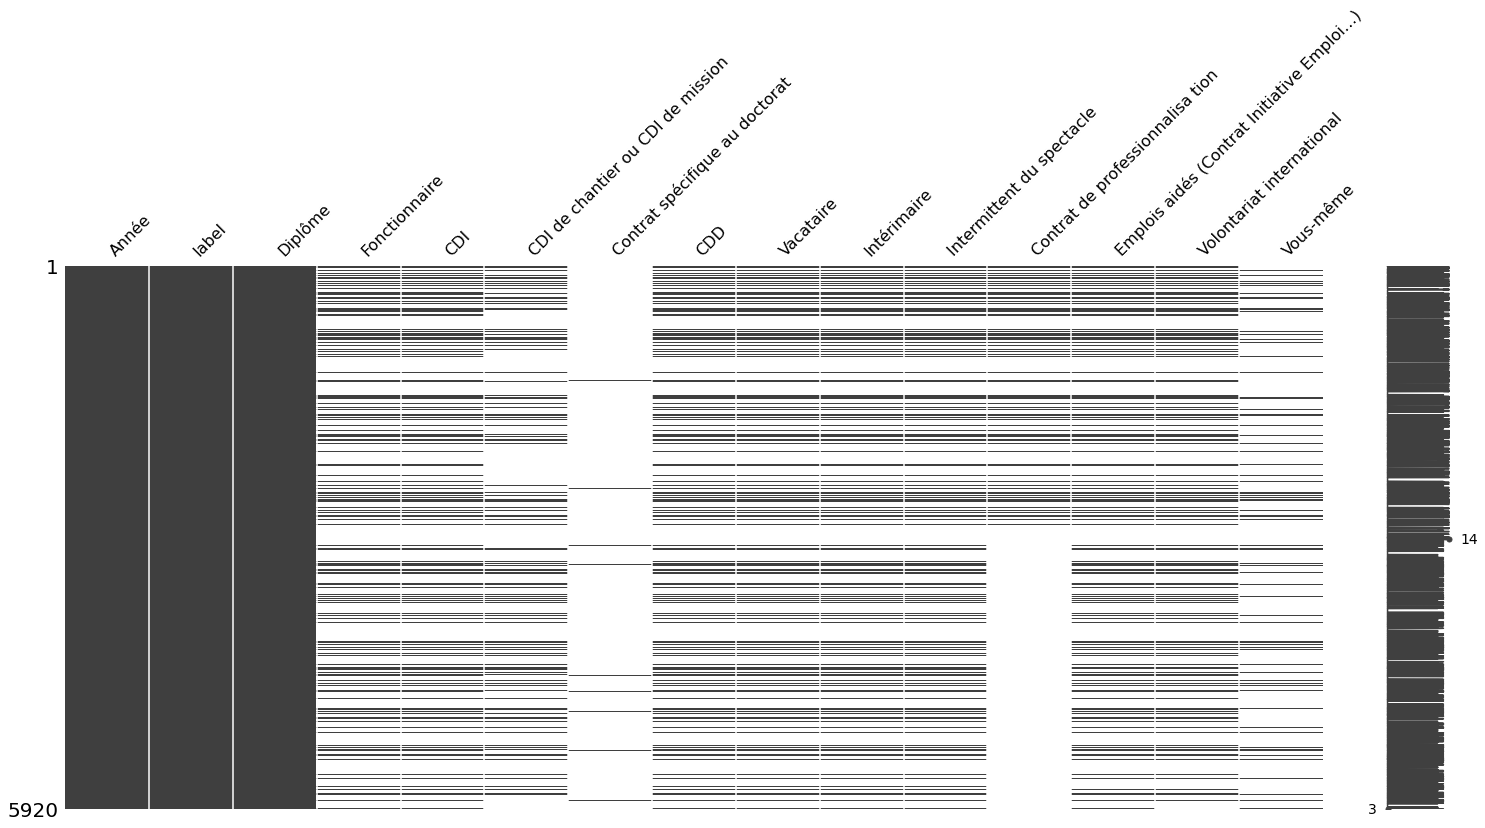

In [1496]:
# Recherche des valeurs manquantes par type de contrats
msno.matrix(df_contrat)
plt.show()

In [1497]:
# Remplacement des valeurs maquantes par la valeur 0
df_contrat = df_contrat.replace([pd.NA, "ns", "nd"], 0)

In [1498]:
df_contrat.sort_values("Année")

,Année,label,Diplôme,Fonctionnaire,CDI,CDI de chantier ou CDI de mission,Contrat spécifique au doctorat,CDD,Vacataire,Intérimaire,Intermittent du spectacle,Contrat de professionnalisa tion,Emplois aidés (Contrat Initiative Emploi…),Volontariat international,Vous-même
3138,2011,M,MASTER LMD,0,0,0,0,0,0,0,0,0,0,0,0
4112,2011,M,MASTER LMD,0,0,0,0,0,0,0,0,0,0,0,0
4032,2011,M,MASTER LMD,0,0,0,0,0,0,0,0,0,0,0,0
5268,2011,M,MASTER LMD,0,0,0,0,0,0,0,0,0,0,0,0
3987,2011,M,MASTER LMD,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,2019,L,LICENCE PRO,0,79,0,0,11,0,8,0,0,1,0,0
3284,2019,M,MASTER LMD,2,29,0,0,59,1,1,0,0,1,0,5
901,2019,D,DUT,1,56,0,0,28,3,3,0,1,0,0,0
4277,2019,M,MASTER LMD,1,69,0,0,18,0,1,0,0,0,2,8


In [1499]:
# Changement de type de variable
val = df_contrat[df_contrat.columns[3:]].astype(int)
df_contrat = df_contrat[["Année", "label", "Diplôme"]].join(val)

In [1500]:
df_contrat

,Année,label,Diplôme,Fonctionnaire,CDI,CDI de chantier ou CDI de mission,Contrat spécifique au doctorat,CDD,Vacataire,Intérimaire,Intermittent du spectacle,Contrat de professionnalisa tion,Emplois aidés (Contrat Initiative Emploi…),Volontariat international,Vous-même
0,2013,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
1,2017,D,DUT,2,78,0,0,14,0,2,0,3,0,1,0
2,2017,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
3,2017,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
4,2017,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,2013,M,MASTER ENS,0,0,0,0,0,0,0,0,0,0,0,0
5916,2019,M,MASTER ENS,76,8,0,0,14,1,0,0,0,0,0,1
5917,2015,M,MASTER ENS,0,0,0,0,0,0,0,0,0,0,0,0
5918,2015,M,MASTER ENS,0,0,0,0,0,0,0,0,0,0,0,0


In [1501]:
# Calcul du nombre de chacun des contrats par année
contrat_count = df_contrat.groupby(["Année", "label", "Diplôme"]).sum()
#contrat_count.reset_index(inplace=True)

In [1502]:
contrat_count.head()

Fonctionnaire   CDI  \
Année label Diplôme                           
2011  M     MASTER ENS              0     0   
            MASTER LMD              0     0   
2012  M     MASTER ENS              0     0   
            MASTER LMD              0     0   
2013  D     DUT                   117  1286   

                        CDI de chantier ou CDI de mission  \
Année label Diplôme                                         
2011  M     MASTER ENS                                  0   
            MASTER LMD                                  0   
2012  M     MASTER ENS                                  0   
            MASTER LMD                                  0   
2013  D     DUT                                         0   

                        Contrat spécifique au doctorat  CDD  Vacataire  \
Année label Diplôme                                                      
2011  M     MASTER ENS                               0    0          0   
            MASTER LMD                               0    0          0   
2012  M     MASTER ENS                               0    0          0   
            MASTER LMD                               0    0          0   
2013  D     DUT                                      0  597         13   

                        Intérimaire  Intermittent du spectacle  \
Année label Diplôme                                              
2011  M     MASTER ENS            0                          0   
            MASTER LMD            0                          0   
2012  M     MASTER ENS            0                          0   
            MASTER LMD            0                          0   
2013  D     DUT                 122                          6   

                        Contrat de professionnalisa tion  \
Année label Diplôme                                        
2011  M     MASTER ENS                                 0   
            MASTER LMD                                 0   
2012  M     MASTER ENS                                 0   
            MASTER LMD                                 0   
2013  D     DUT                                       23   

                        Emplois aidés (Contrat Initiative Emploi…)  \
Année label Diplôme                                                  
2011  M     MASTER ENS                                           0   
            MASTER LMD                                           0   
2012  M     MASTER ENS                                           0   
            MASTER LMD                                           0   
2013  D     DUT                                                 48   

                        Volontariat international  Vous-même  
Année label Diplôme                                           
2011  M     MASTER ENS                          0          0  
            MASTER LMD                          0          0  
2012  M     MASTER ENS                          0          0  
            MASTER LMD                          0          0  
2013  D     DUT                                 2         40

In [1503]:
# Suppression des années 2011-2012 dont toutes les valeurs sont manquantes
contrat_count.drop([2011, 2012], axis=0, inplace=True)

In [1504]:
# total du nombre de contrat par année et par diplôme
contrat_count["total"] = contrat_count.sum(axis=1)

In [1505]:
contrat_count.reset_index(inplace=True)

In [1506]:
df_contrat = contrat_count.melt(id_vars=["Année", "label", "Diplôme", "total"], value_vars=contrat_count.columns, var_name="contrat", value_name="nb")

In [1507]:
# Pourcentage d'insertion pour chaque type de contrat par année
df_contrat["%"] = (round(df_contrat["nb"] / df_contrat["total"] * 100, 1)).fillna(0)

In [1508]:
df_contrat

,Année,label,Diplôme,total,contrat,nb,%
0,2013,D,DUT,2254,Fonctionnaire,117,5.2
1,2013,L,LICENCE PRO,3525,Fonctionnaire,139,3.9
2,2013,M,MASTER ENS,197,Fonctionnaire,164,83.2
3,2013,M,MASTER LMD,3520,Fonctionnaire,202,5.7
4,2014,D,DUT,2546,Fonctionnaire,216,8.5
...,...,...,...,...,...,...,...
319,2018,M,MASTER LMD,8721,Vous-même,150,1.7
320,2019,D,DUT,10869,Vous-même,271,2.5
321,2019,L,LICENCE PRO,18506,Vous-même,479,2.6
322,2019,M,MASTER ENS,597,Vous-même,3,0.5


In [1509]:
df_graph = df_contrat.pivot_table(index="Année", values="%", columns="contrat")

In [1510]:
df_graph.head()

contrat,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisa tion,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,
2013,22.250,45.650,0.000,0.300,0.0,1.425,24.50,0.450,2.975,0.850,0.300,1.275
2014,23.400,44.550,0.000,0.500,0.0,1.125,24.50,0.350,3.150,0.800,0.375,1.200
2015,22.150,45.525,0.000,0.425,0.0,1.150,24.75,0.375,3.325,0.725,0.375,1.175
2016,21.025,46.650,0.000,0.550,0.0,0.550,24.85,0.500,3.150,0.600,0.400,1.725
2017,20.925,48.150,0.225,0.475,0.0,0.100,24.05,0.375,2.750,0.750,0.425,1.700


In [1511]:
# Changement de l'ordre des colonnes selon la valeur maximale de chacune d'entre elles.
col_order = df_graph.max().sort_values().index

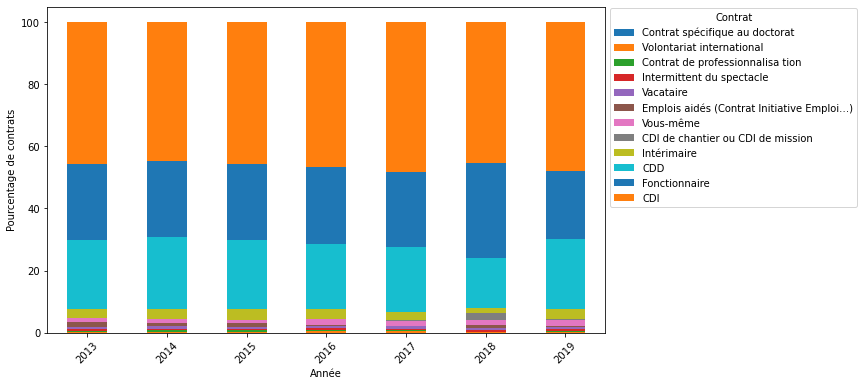

In [1512]:
# Graphique du pourcentage par type de contrats selon l'année
df_graph[col_order].plot(kind="bar", stacked=True, figsize=(10, 6))
plt.legend(title="Contrat", bbox_to_anchor=(1, 1.01))
plt.xticks(rotation=45)
plt.ylabel("Pourcentage de contrats")
plt.show()

In [1513]:
# Graphs intégrant le niveau du diplôme
df_graph = df_contrat.pivot_table(index=["Année", "Diplôme"], values="%", columns="contrat")

In [1514]:
df_graph.reset_index("Diplôme", inplace=True)

In [1515]:
df_graph.head()

contrat,Diplôme,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisa tion,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,,
2013,DUT,26.5,57.1,0.0,1.0,0.0,2.1,5.2,0.3,5.4,0.6,0.1,1.8
2013,LICENCE PRO,25.0,62.0,0.0,0.2,0.0,2.1,3.9,0.8,4.1,0.5,0.0,1.4
2013,MASTER ENS,9.1,6.1,0.0,0.0,0.0,0.5,83.2,0.0,0.0,1.0,0.0,0.0
2013,MASTER LMD,28.4,57.4,0.0,0.0,0.0,1.0,5.7,0.7,2.4,1.3,1.1,1.9
2014,DUT,28.7,51.8,0.0,1.6,0.0,1.7,8.5,0.2,5.5,0.7,0.0,1.3


In [1516]:
# Liste des diplômes
diplomes = df_graph["Diplôme"].unique()

In [1517]:
df_graph[df_graph["Diplôme"] == "DUT"]

contrat,Diplôme,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisa tion,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,,
2013,DUT,26.5,57.1,0.0,1.0,0.0,2.1,5.2,0.3,5.4,0.6,0.1,1.8
2014,DUT,28.7,51.8,0.0,1.6,0.0,1.7,8.5,0.2,5.5,0.7,0.0,1.3
2015,DUT,28.5,52.4,0.0,1.3,0.0,2.2,6.9,0.2,6.3,0.7,0.2,1.4
2016,DUT,26.2,55.7,0.0,2.0,0.0,1.1,5.9,0.2,6.7,0.2,0.2,1.8
2017,DUT,25.8,57.3,0.0,1.6,0.0,0.2,6.2,0.0,5.4,1.0,0.2,2.2
2019,DUT,22.5,59.0,0.2,0.6,0.0,0.6,6.8,0.7,6.4,0.6,0.0,2.5


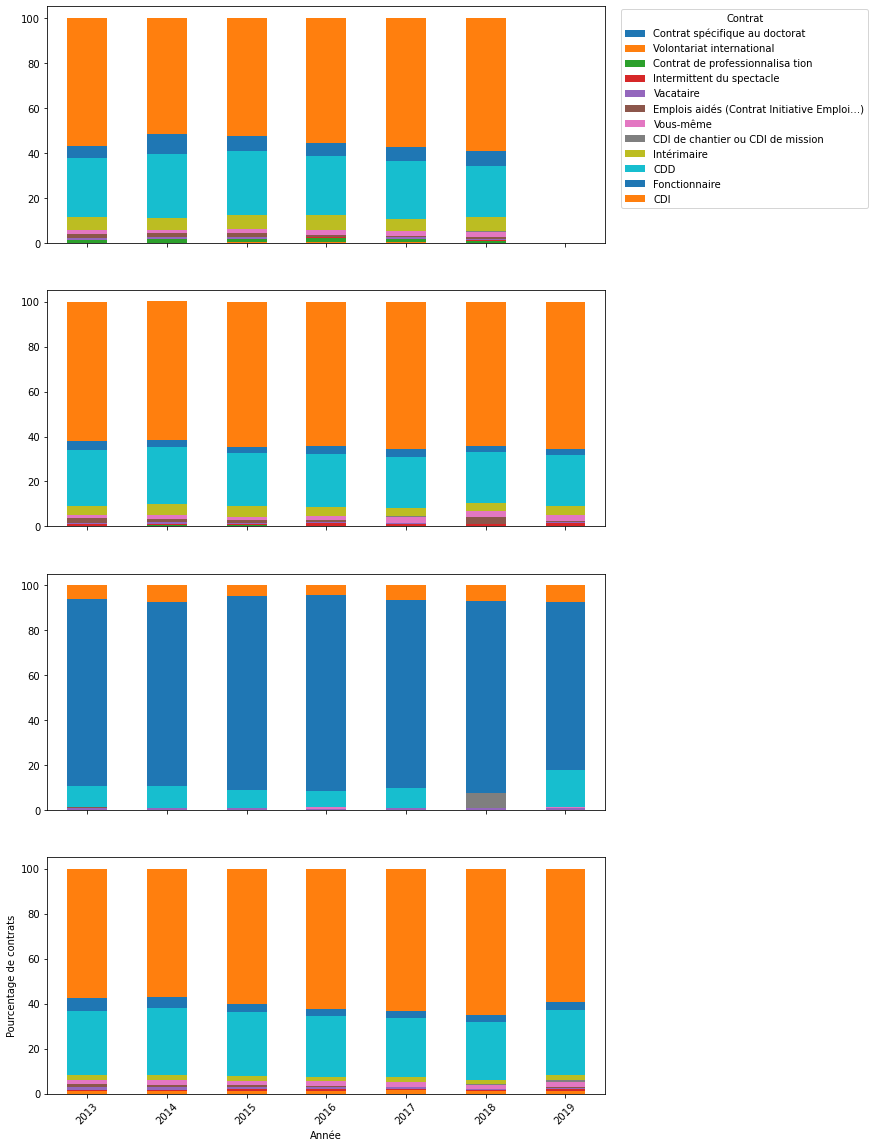

In [1518]:
# Sélection par diplôme
df1 = df_graph[df_graph["Diplôme"] == "DUT"]
df2 = df_graph[df_graph["Diplôme"] == "LICENCE PRO"]
df3 = df_graph[df_graph["Diplôme"] == "MASTER ENS"]
df4 = df_graph[df_graph["Diplôme"] == "MASTER LMD"]
# Création des graphs
fig, (ax1,ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True,figsize = (10, 20))
df1[col_order].plot(kind="bar", stacked=True, ax=ax1, legend=True)
df2[col_order].plot(kind="bar", stacked=True, ax=ax2, legend=False)
df3[col_order].plot(kind="bar", stacked=True, ax=ax3, legend=False)
df4[col_order].plot(kind="bar", stacked=True, ax=ax4, legend=False)
ax1.legend(title="Contrat", bbox_to_anchor=(1.02, 1.01))
plt.xticks(rotation=45)
plt.ylabel("Pourcentage de contrats")
plt.show()


# Sélection des DUT
for diplome in diplomes:
    #df_graph = df_graph[df_graph.index.get_level_values("Diplôme") == diplome]
    df_graph = df_graph[df_graph["Diplôme"] == diplome]
    df_graph[col_order].plot(kind="bar", stacked=True, figsize=(10, 6))
    plt.legend(title="Contrat", bbox_to_anchor=(1, 1.01))
    plt.xticks(rotation=45)
    plt.ylabel("Pourcentage de contrats")
    plt.show()